In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Load the data
data = pd.read_csv('/content/movies.csv')
# Preprocessing
print(data['Audience Score'].isnull().sum())

2020


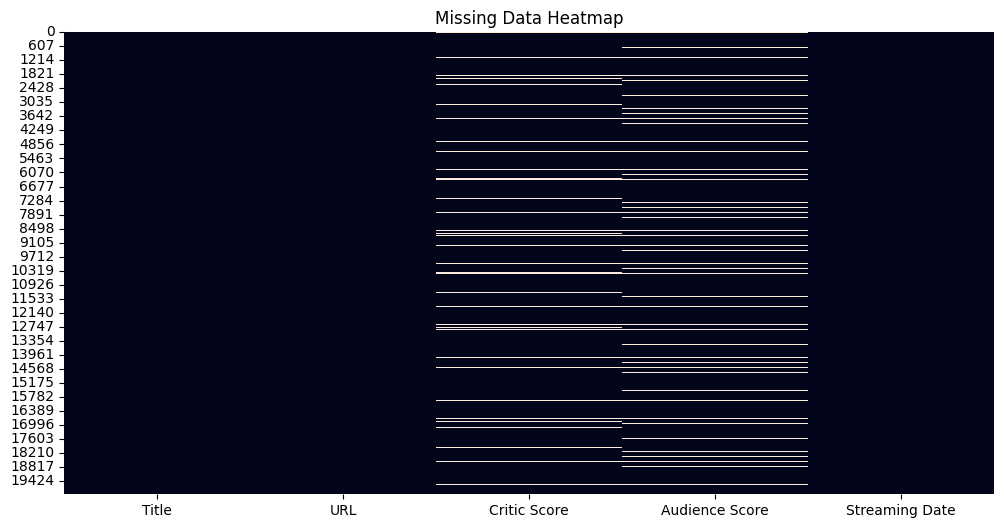

In [128]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


In [129]:
data = data.dropna(subset=['Audience Score'])

In [130]:
#'Audience Score' is the column with audience scores
data['audience_score_binary'] = (data['Audience Score'] >= 50).astype(int)
data.drop(columns=['Audience Score'], inplace=True)

le = LabelEncoder()
for column in data.columns[data.dtypes == 'object']:
    data[column] = le.fit_transform(data[column])

<ipython-input-130-07156e957556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['audience_score_binary'] = (data['Audience Score'] >= 50).astype(int)
<ipython-input-130-07156e957556>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Audience Score'], inplace=True)
<ipython-input-130-07156e957556>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

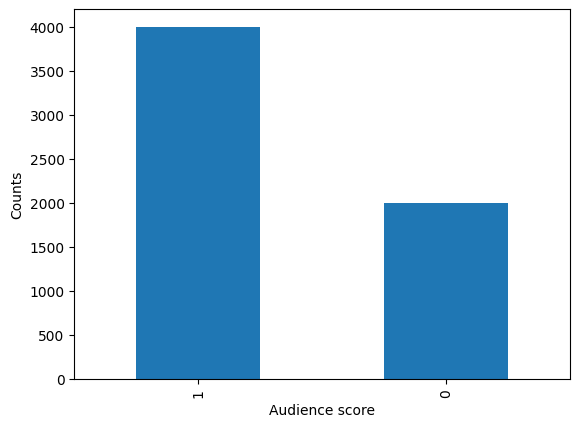

In [131]:
# Filter the positive and negative classes
positive_class = data[data['audience_score_binary'] == 1]
negative_class = data[data['audience_score_binary'] == 0]

positive_sample = positive_class.sample(n=4000, random_state=42) if len(positive_class) > 4000 else positive_class

balanced_data = pd.concat([positive_sample, negative_class])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data['audience_score_binary'].value_counts().plot(kind='bar')
plt.xlabel('Audience score')
plt.ylabel('Counts')
plt.show()


In [132]:
# Split data
X = balanced_data.drop('audience_score_binary', axis=1)
y = balanced_data['audience_score_binary']

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


imputer = SimpleImputer(strategy='median')

# Create a SVM model
model = SVC()


pipeline = Pipeline([
    ('imputer', imputer),
    ('SVM', model)
])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [134]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.928


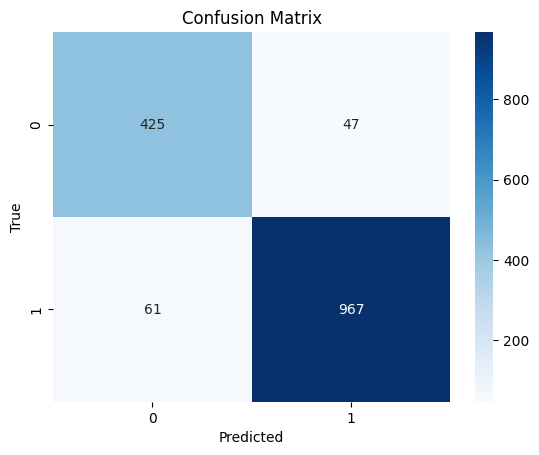

Precision: 0.9536489151873767
Recall: 0.9406614785992218
F1 Score: 0.9471106758080314


In [135]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<Figure size 800x600 with 0 Axes>

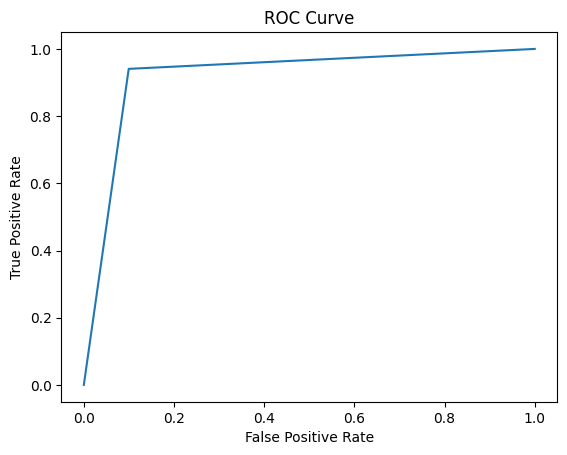

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()


In [137]:
import pandas as pd
df = pd.read_csv("/content/movies.csv")
df

,Title,URL,Critic Score,Audience Score,Streaming Date
0,Abigail,https://www.rottentomatoes.com/m/abigail_2024,84.0,85.0,"Streaming May 7, 2024"
1,Ghostbusters: Frozen Empire,https://www.rottentomatoes.com/m/ghostbusters_...,43.0,83.0,"Streaming May 7, 2024"
2,Wicked Little Letters,https://www.rottentomatoes.com/m/wicked_little...,79.0,91.0,"Streaming May 7, 2024"
3,Billy & Molly: An Otter Love Story,https://www.rottentomatoes.com/m/billy_and_mol...,100.0,100.0,"Streaming May 7, 2024"
4,Founders Day,https://www.rottentomatoes.com/m/founders_day,46.0,12.0,"Streaming May 7, 2024"
...,...,...,...,...,...
19997,Saltburn,https://www.rottentomatoes.com/m/saltburn,71.0,79.0,"Streaming Dec 22, 2023"
19998,Parasite,https://www.rottentomatoes.com/m/parasite_2019,99.0,90.0,"Streaming Oct 11, 2019"
19999,Ordinary Angels,https://www.rottentomatoes.com/m/ordinary_angels,85.0,99.0,"Streaming Mar 26, 2024"
20000,No Hard Feelings,https://www.rottentomatoes.com/m/no_hard_feeli...,70.0,87.0,"Streaming Aug 15, 2023"
